In [1]:
# Imports de utilidades de Python
import numpy as np
import matplotlib.pyplot as plt
import git
import os, sys

path_git = git.Repo('.', search_parent_directories=True).working_tree_dir
os.chdir(os.path.join(path_git, 'utils'))
from functions import *

os.chdir(path_git)


2024-11-12 13:52:47.127274: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Parámetros de la simulación

# choose a number of time steps
look_back = 45

# Cantidad de valores por cada paso temporal
n_features = 1

# Cantidad de pasos que queremos predecir hacia adelante
window_size = 110

# longitud de la cadena izquierda
len_left_chain = 500

# longitud de la cadena derecha
len_right_chain = 720

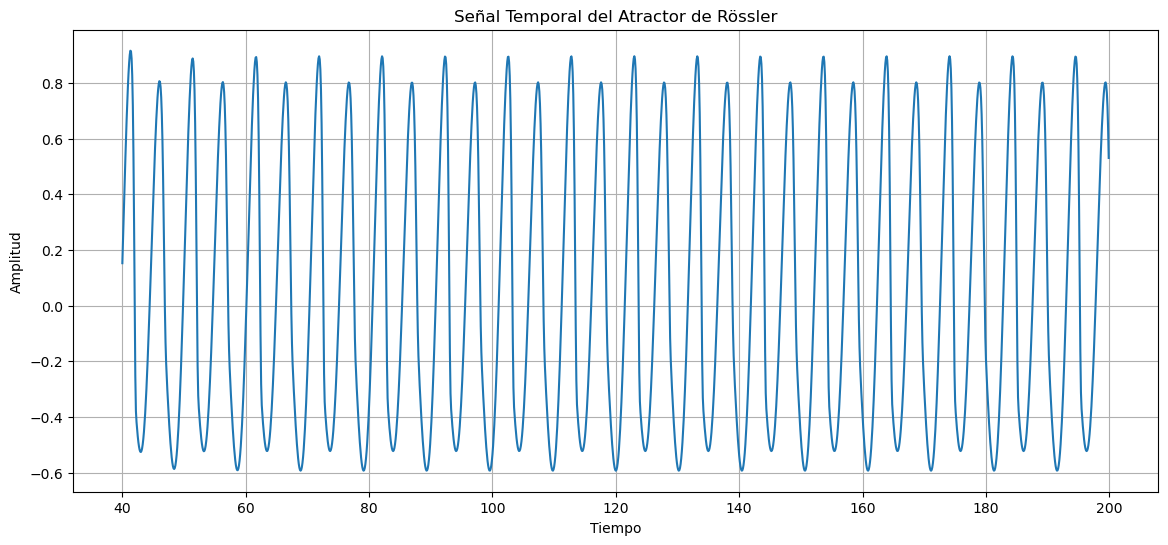

In [3]:
# Generamos la señal temporal

# Parámetros para el atractor de Rössler
a = 0.2
b = 0.2
c = 5.7

# Paso de tiempo y número de pasos
dt = 0.1
num_steps = 2000

# Vector de tiempos
t = np.arange(0, num_steps * dt, dt)

# Generar la secuencia temporal para el atractor de Rössler
raw_seq, _, _ = rossler_attractor(a, b, c, dt, num_steps)

# Normalizar la secuencia
maximo = np.max(np.abs(raw_seq))
raw_seq = raw_seq / maximo

# Acortar la secuencia para que no sea tan larga y tenga una amplitud similar
raw_seq = raw_seq[400:]
t = t[400:]

# Graficar la señal temporal
plt.figure(figsize=(14, 6))
plt.plot(t, raw_seq)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal Temporal del Atractor de Rössler')
plt.grid(True)
plt.show()

In [4]:
raw_seq_1 = raw_seq[0:len_left_chain]
t_1 = t[0:len_left_chain]

print(len(raw_seq_1),len_left_chain)

500 500


In [5]:
raw_seq_2 = raw_seq[len_left_chain+window_size:len_left_chain+window_size + len_right_chain]
t_2 = t[len_left_chain+window_size:len_left_chain+window_size + len_right_chain]

raw_seq_2_bw = raw_seq_2[::-1]
t_2_bw = t_2[::-1]

print(len(raw_seq_2),len_right_chain)

720 720


In [6]:
t_window = t[len_left_chain:len_left_chain+window_size]
raw_seq_window = raw_seq[len_left_chain:len_left_chain+window_size]
print(len(raw_seq_window),window_size)

110 110


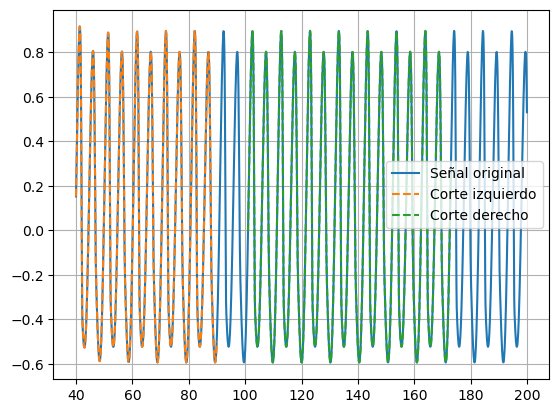

In [7]:
plt.plot(t,raw_seq, label='Señal original')
plt.plot(t_1,raw_seq_1, '--', label='Corte izquierdo')
plt.plot(t_2,raw_seq_2, '--', label='Corte derecho')
plt.grid()
plt.legend()
plt.show()

In [8]:
print('t_1 limits:',t_1[0],t_1[-1])
print('t_window limits:', t_window[0],t_window[-1])
print('t_2 limits:',t_2[0],t_2[-1])
print('t limits:',t[0],t[-1])
print('len of times:', len(t_1),len(t_window),len(t_2),len(t))

t_1 limits: 40.0 89.9
t_window limits: 90.0 100.9
t_2 limits: 101.0 172.9
t limits: 40.0 199.9
len of times: 500 110 720 1600


In [9]:
predicciones_adelante_1,valores_reales_1 = make_predictions(raw_seq_1, look_back, n_features, raw_seq_window)

2024-11-12 13:45:40.222752: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1/1 [==============================] - 0s 28ms/step


In [10]:
# Calculamos el error
diferencia_1 = np.abs(predicciones_adelante_1-raw_seq_window)

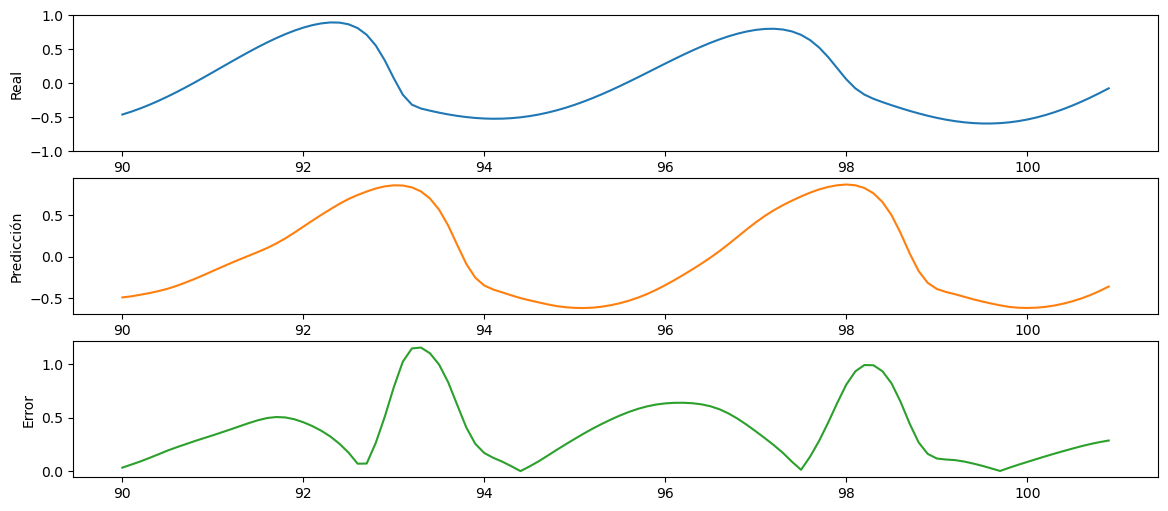

In [11]:
fig = plt.figure(figsize = (14,6))
plt.subplot(3,1,1)
plt.plot(t_window,raw_seq_window)
plt.ylabel('Real')
plt.ylim(-1,1)
plt.subplot(3,1,2)
plt.plot(t_window,predicciones_adelante_1,c='C1')
plt.ylabel('Predicción')
#plt.ylim(-1,1)
plt.subplot(3,1,3)
plt.plot(t_window,diferencia_1,c='C2')
plt.ylabel('Error')
#plt.ylim(0,5)
plt.show()

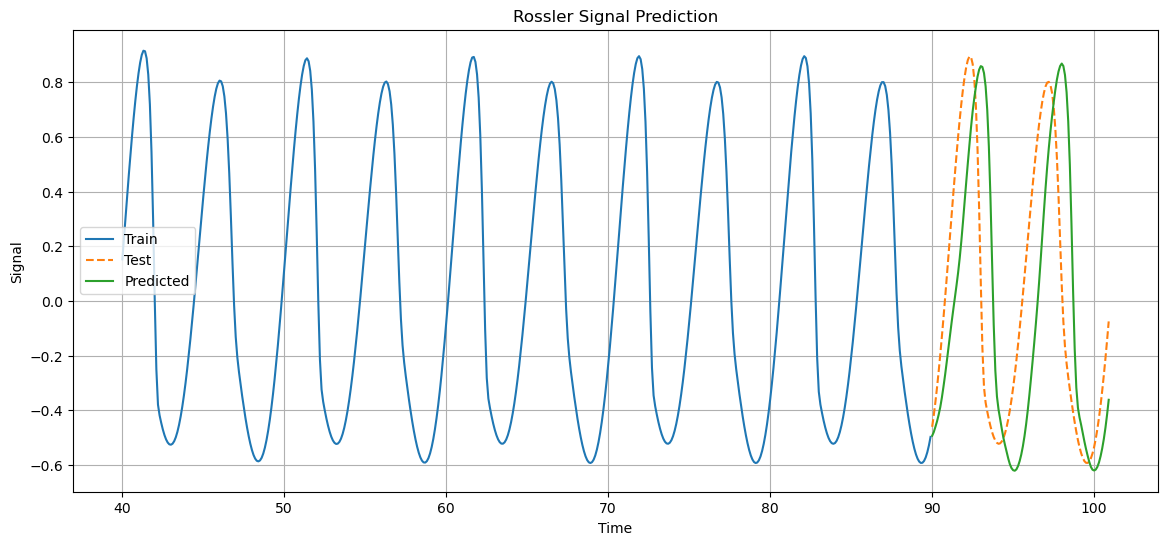

In [12]:
fig = plt.figure(figsize = (14,6))
plt.plot(t_1,raw_seq_1,label='Train')
plt.plot(t_window,raw_seq_window,'--',label='Test')
plt.plot(t_window,predicciones_adelante_1,label='Predicted')
plt.grid()
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Rossler Signal Prediction')
plt.legend()
plt.savefig('figures/rossler_signal_prediction_1.png')
plt.show()

In [13]:
# split into samples
predicciones_adelante_2_bw,valores_reales_2_bw = make_predictions(raw_seq_2_bw, look_back, n_features, raw_seq_window[::-1])

1/1 [==============================] - 0s 28ms/step


In [14]:
predicciones_adelante_2 = predicciones_adelante_2_bw[::-1]
valores_reales_2 = valores_reales_2_bw[::-1]

# Calculamos el error
diferencia_2 = np.abs(predicciones_adelante_2-raw_seq_window)

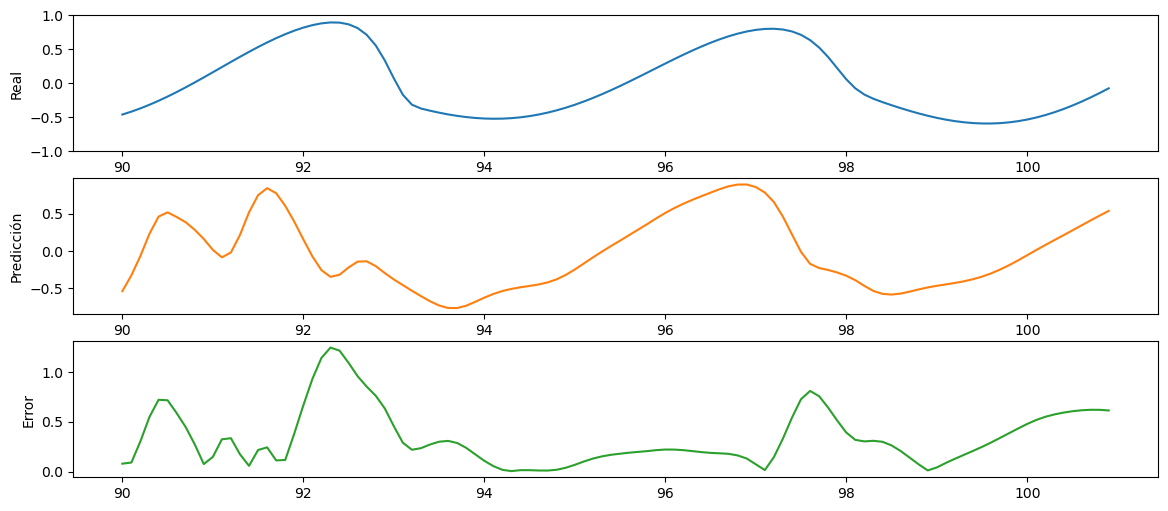

In [15]:
fig = plt.figure(figsize = (14,6))
plt.subplot(3,1,1)
plt.plot(t_window,raw_seq_window)
plt.ylabel('Real')
plt.ylim(-1,1)
plt.subplot(3,1,2)
plt.plot(t_window,predicciones_adelante_2,c='C1')
plt.ylabel('Predicción')
#plt.ylim(-1,1)
plt.subplot(3,1,3)
plt.plot(t_window,diferencia_2,c='C2')
plt.ylabel('Error')
#plt.ylim(0,5)
plt.show()

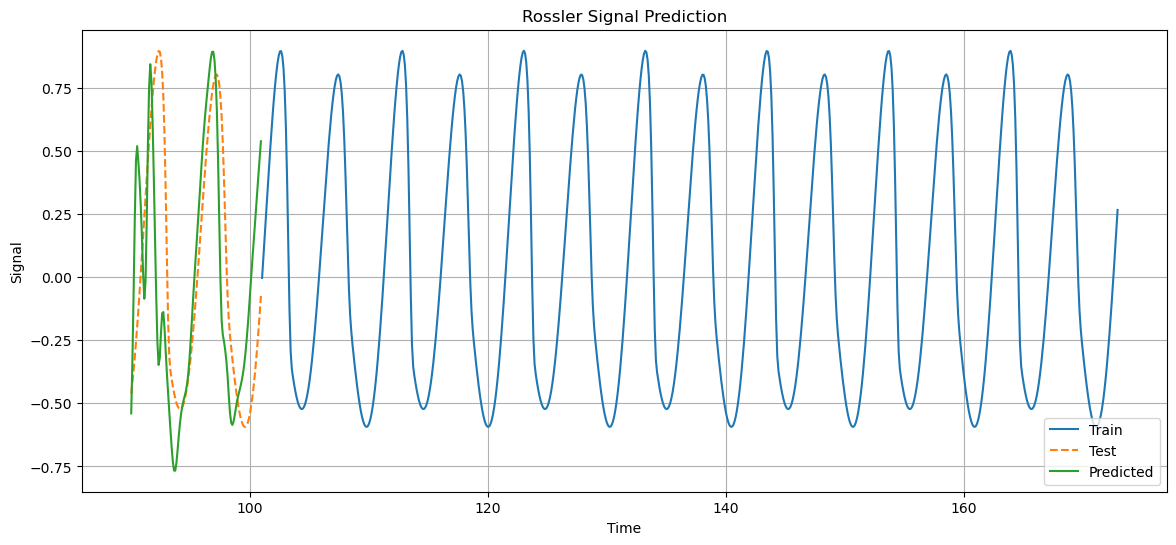

In [16]:
fig = plt.figure(figsize = (14,6))
plt.plot(t_2,raw_seq_2,label='Train')
plt.plot(t_window,raw_seq_window,'--',label='Test')
plt.plot(t_window,predicciones_adelante_2,label='Predicted')
plt.grid()
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Rossler Signal Prediction')
plt.legend()
plt.savefig('figures/rossler_signal_prediction_2.png')
plt.show()

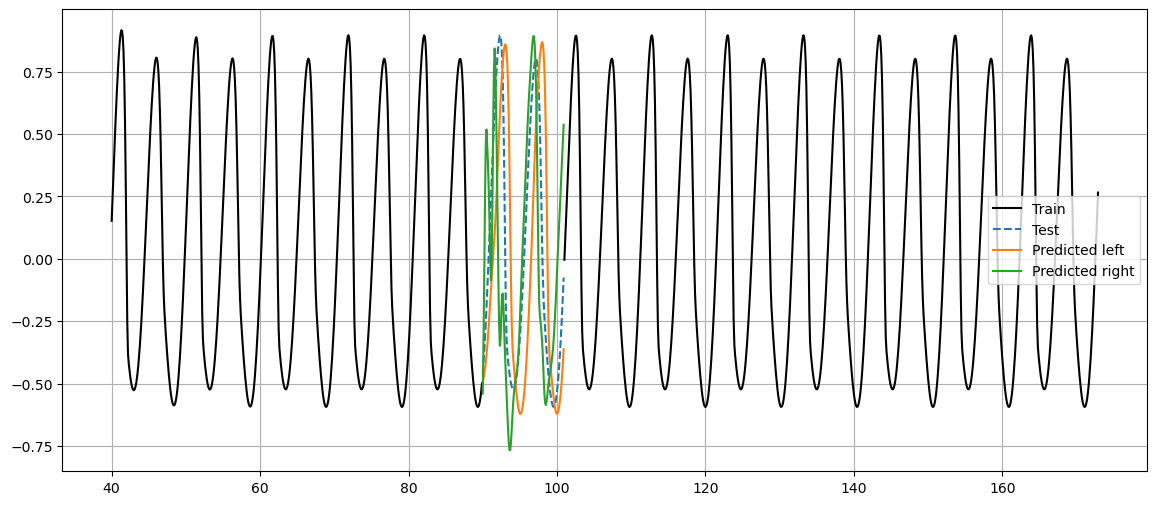

In [17]:
fig = plt.figure(figsize = (14,6))
plt.plot(t_1,raw_seq_1,'k',label='Train')
plt.plot(t_window,valores_reales_1,'--',label='Test')
plt.plot(t_window,predicciones_adelante_1,label='Predicted left')
plt.plot(t_2,raw_seq_2,'k')
plt.plot(t_window,predicciones_adelante_2,label='Predicted right')
plt.grid()
plt.legend()


In [18]:
prediction_mean = (predicciones_adelante_1 + predicciones_adelante_2)/2


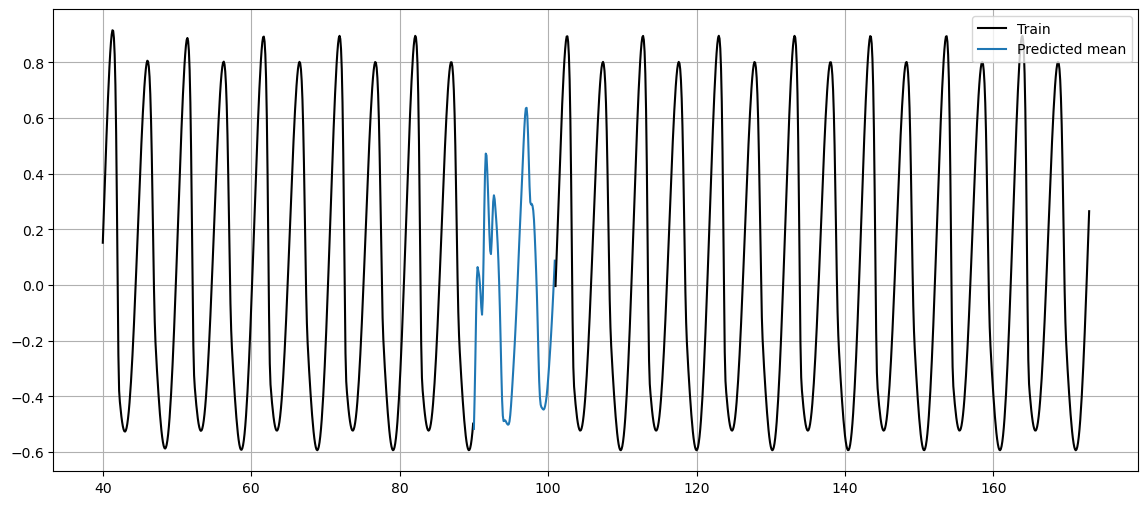

In [19]:
fig = plt.figure(figsize = (14,6))
plt.plot(t_1,raw_seq_1,'k',label='Train')
plt.plot(t_window,prediction_mean,label='Predicted mean')
plt.plot(t_2,raw_seq_2,'k')
plt.grid()
plt.legend()


# Sophisticating the prediction: Weighted means

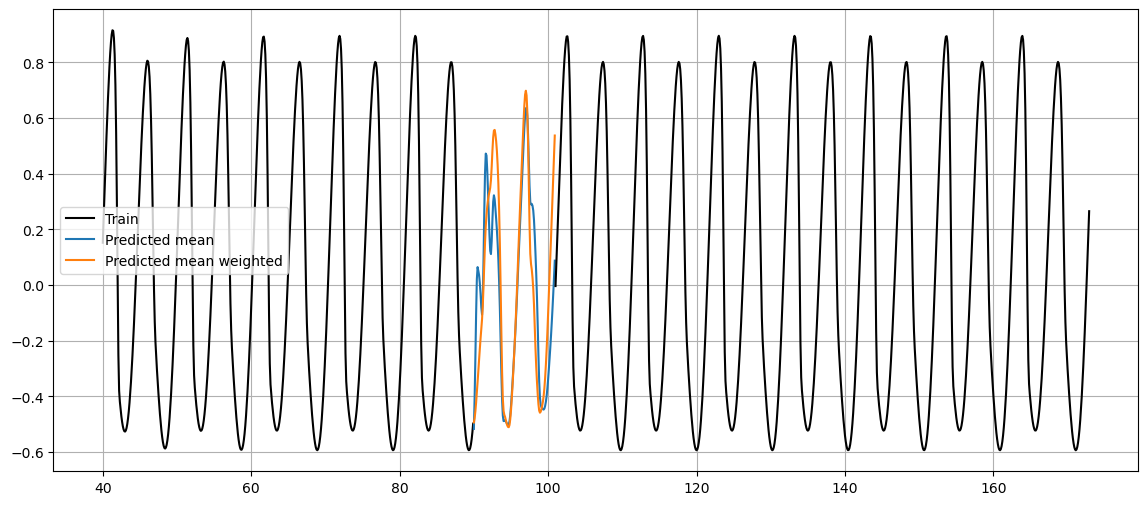

In [20]:
prediction_mean = (predicciones_adelante_1 + predicciones_adelante_2)/2
prediction_mean_weighted = weighted_mean(predicciones_adelante_1, predicciones_adelante_2)

fig = plt.figure(figsize = (14,6))
plt.plot(t_1,raw_seq_1,'k',label='Train')
plt.plot(t_window,prediction_mean,label='Predicted mean')
plt.plot(t_window,prediction_mean_weighted,label='Predicted mean weighted')
plt.plot(t_2,raw_seq_2,'k')
plt.grid()
plt.legend()
plt.savefig('figures/rossler_signal_prediction_mean.png')


# Mean Squared Error (MSE)

To stimate the error of the prediction, we compute the Mean Squared Error (MSE):

\begin{equation}
    MSE = \frac{1}{N-1}\sum_i (y_i - \tilde{y}_i)^2 \, ,
\end{equation}

where $y_i$, $\tilde{y}_i$ are the prediction and the real signal at point $i$, respectively.

In [21]:
MSE = np.sum((valores_reales_1 - prediction_mean)**2)/(len(valores_reales_1)-1)

print('MSE:',MSE)

MSE: 0.07247374042441994


In [22]:
print(len(predicciones_adelante_2),len(predicciones_adelante_1),len(prediction_mean))

110 110 110
